## Косинского Никиты 
### 8 группа
### Лабараторная работа 1
### Преподаватель: Полузеров Тимофей Дмитриевич

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

def c_bool(val):
    c = 'white' if val else 'red'
    return f'background-color: {c}; text-align: center;'

pd.set_option('display.max_columns', None)
df = pd.read_csv(r"D:\pProjects\lab_1\data\Annual 2005-2011.csv")
print("Размер данных:", df.shape)

sts = pd.DataFrame({
    'Минимум': df.min(),
    'Максимум': df.max(),
    'Размах': df.max() - df.min(),
    'Среднее': df.mean(),
    'Дисперсия': df.var(),
    'Стандартное отклонение': df.std(),
    'Медиана': df.median(),
    'Квантиль 0.01': df.quantile(0.01),
    'Квантиль 0.05': df.quantile(0.05),
    'Квантиль 0.95': df.quantile(0.95),
    'Квантиль 0.99': df.quantile(0.99)
})

print("\nСтатистики:")
display(sts)

Размер данных: (2695, 22)

Статистики:


,Минимум,Максимум,Размах,Среднее,Дисперсия,Стандартное отклонение,Медиана,Квантиль 0.01,Квантиль 0.05,Квантиль 0.95,Квантиль 0.99
empl_num,10.000000,28650.000000,28640.000000,1220.773284,6.535214e+06,2556.406482,473.000000,36.940000,91.000000,5152.400000,12526.780000
k1,0.248322,18.020148,17.771826,2.002089,2.856275e+00,1.690052,1.473859,0.423381,0.663925,5.258034,9.002944
k2,0.000000,7.029135,7.029135,0.238018,2.680105e-01,0.517697,0.055551,0.000340,0.002725,1.128667,2.636539
k3,0.008329,11.187699,11.179370,0.825098,8.432594e-01,0.918292,0.538349,0.061415,0.124851,2.544703,4.917381
k4,-4.569874,0.935935,5.505809,0.038115,3.908187e-01,0.625155,0.148620,-2.450093,-0.977473,0.755809,0.881929
k5,0.009944,1.083702,1.073758,0.346330,3.920708e-02,0.198008,0.319908,0.037373,0.068282,0.712523,0.860138
k6,0.000000,1.000000,1.000000,0.238031,4.540896e-02,0.213094,0.185185,0.000000,0.000000,0.663608,0.859919
k7,0.000000,1.000000,1.000000,0.174212,4.984752e-02,0.223266,0.075676,0.000000,0.000000,0.674139,0.890017
k8,0.053766,0.990056,0.936290,0.655964,3.832761e-02,0.195774,0.681890,0.160895,0.292537,0.932723,0.962348
k9,0.059320,199.605839,199.546520,6.862756,6.309532e+01,7.943256,4.758963,0.455832,1.048860,19.642377,35.671475


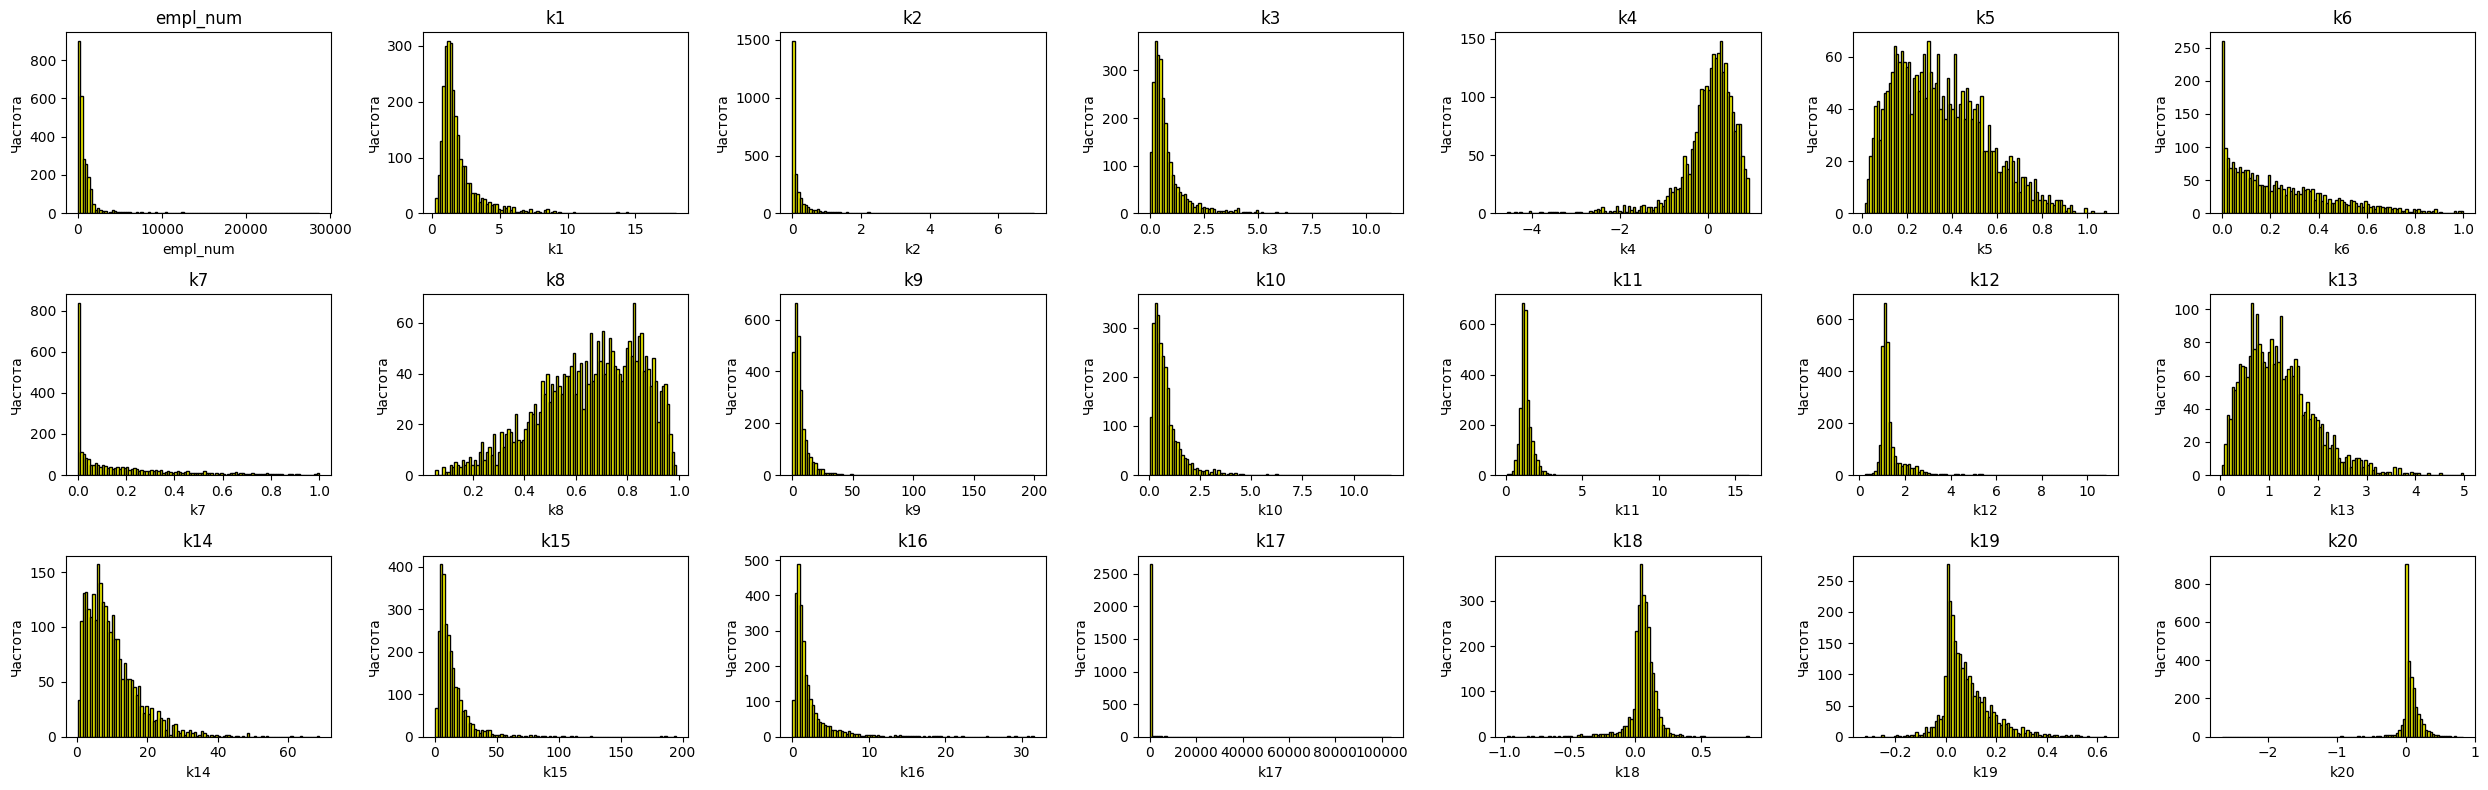

In [8]:
cols = df.select_dtypes(include=[np.number]).columns

cols_for_hist = cols[:-1]

fig, axes = plt.subplots(3, 7, figsize=(25, 8))

for idx, col in enumerate(cols_for_hist):
    row = idx // 7
    col_idx = idx % 7
    
    if row < 3: 
        axes[row, col_idx].hist(df[col].dropna(), bins=100, color='yellow', edgecolor='black')
        axes[row, col_idx].set_title(f'{col}')
        axes[row, col_idx].set_xlabel(col)
        axes[row, col_idx].set_ylabel('Частота')

plt.tight_layout()
plt.show()

In [9]:
corr_ma = df.corr(method='pearson')
print("\nМатрица корреляций Пирсона")
display(corr_ma)


Матрица корреляций Пирсона


,empl_num,k1,k2,k3,k4,k5,k6,k7,k8,k9,k10,k11,k12,k13,k14,k15,k16,k17,k18,k19,k20,year
empl_num,1.000000,0.035067,0.039541,0.057712,0.008973,-0.045174,-0.148917,-0.063621,0.044002,0.014358,0.006846,-0.002378,0.005375,-0.062109,0.002358,-0.067429,-0.087362,0.056114,0.096272,0.019471,0.017363,-0.001502
k1,0.035067,1.000000,0.732549,0.883032,0.452525,-0.412064,-0.113531,-0.248283,0.405975,0.557893,0.070738,-0.002682,0.038813,0.048098,0.540829,0.023106,-0.256268,0.004299,0.226630,0.313667,0.187206,0.114381
k2,0.039541,0.732549,1.000000,0.812905,0.327937,-0.318344,-0.123917,-0.208498,0.317151,0.368025,0.078641,0.032757,0.051065,0.040822,0.374173,0.092893,-0.129728,0.013061,0.202906,0.317995,0.185868,0.077838
k3,0.057712,0.883032,0.812905,1.000000,0.398493,-0.355593,-0.110743,-0.227242,0.350851,0.510083,0.095931,0.027845,0.068067,0.077963,0.492752,-0.083706,-0.303649,0.016845,0.236955,0.344531,0.213435,0.116602
k4,0.008973,0.452525,0.327937,0.398493,1.000000,-0.557490,-0.090429,-0.263460,0.556975,0.237392,0.209692,0.012222,-0.077811,0.279167,0.338707,0.064928,-0.264211,0.016276,0.415230,0.441954,0.366759,0.010729
k5,-0.045174,-0.412064,-0.318344,-0.355593,-0.557490,1.000000,0.036943,0.166313,-0.996378,-0.488575,0.404071,0.018430,0.053309,0.025730,-0.319249,-0.234310,0.054876,-0.047257,-0.178914,-0.245414,-0.152431,0.040350
k6,-0.148917,-0.113531,-0.123917,-0.110743,-0.090429,0.036943,1.000000,0.391975,-0.032126,-0.032287,-0.084025,-0.099150,-0.147884,-0.130656,-0.154374,-0.073267,0.075172,-0.014597,-0.243185,-0.225752,-0.219151,-0.116653
k7,-0.063621,-0.248283,-0.208498,-0.227242,-0.263460,0.166313,0.391975,1.000000,-0.161284,-0.133519,-0.089642,-0.079915,-0.108884,-0.245651,-0.325492,-0.141712,0.152253,0.007264,-0.292535,-0.329748,-0.279798,-0.084229
k8,0.044002,0.405975,0.317151,0.350851,0.556975,-0.996378,-0.032126,-0.161284,1.000000,0.489973,-0.410951,-0.020897,-0.055908,-0.031170,0.316123,0.235426,-0.049662,0.046653,0.176937,0.241966,0.151142,-0.055604
k9,0.014358,0.557893,0.368025,0.510083,0.237392,-0.488575,-0.032287,-0.133519,0.489973,1.000000,-0.255027,-0.012213,0.014529,-0.225022,0.540732,0.047573,-0.203250,0.008074,0.065476,-0.003780,-0.015175,0.023085


In [10]:
p_val = df.corr(method=lambda x, y: stats.pearsonr(x, y)[1]) - np.eye(len(df.columns))
p_val_df = pd.DataFrame(p_val, columns=df.columns, index=df.columns)

print("\np-значения для корреляций")
display(p_val_df)


p-значения для корреляций


,empl_num,k1,k2,k3,k4,k5,k6,k7,k8,k9,k10,k11,k12,k13,k14,k15,k16,k17,k18,k19,k20,year
empl_num,0.000000e+00,6.873243e-02,4.011572e-02,2.725475e-03,6.414814e-01,1.901536e-02,7.813178e-15,9.511767e-04,2.235187e-02,4.562432e-01,7.224056e-01,9.018019e-01,7.803292e-01,1.255632e-03,9.026075e-01,4.603618e-04,5.576754e-06,0.003568,5.525212e-07,3.122920e-01,3.675775e-01,9.378783e-01
k1,6.873243e-02,0.000000e+00,0.000000e+00,0.000000e+00,3.448569e-136,5.663318e-111,3.417791e-09,3.820532e-39,1.808754e-107,2.481508e-220,2.377152e-04,8.893000e-01,4.393360e-02,1.251659e-02,1.298573e-204,2.304806e-01,1.128290e-41,0.823472,9.882343e-33,1.329228e-62,1.117717e-22,2.605861e-09
k2,4.011572e-02,0.000000e+00,0.000000e+00,0.000000e+00,1.366766e-68,1.573170e-64,1.083161e-10,7.479511e-28,4.917040e-64,3.257737e-87,4.370273e-05,8.909037e-02,8.013987e-03,3.408192e-02,2.578986e-90,1.361345e-06,1.378976e-11,0.497937,1.952084e-26,2.196969e-64,2.257629e-22,5.229935e-05
k3,2.725475e-03,0.000000e+00,0.000000e+00,0.000000e+00,2.916480e-103,3.810712e-81,8.209866e-09,6.643137e-33,6.684194e-79,1.792035e-178,6.060285e-07,1.484135e-01,4.061591e-04,5.086720e-05,7.028558e-165,1.354526e-05,1.363803e-58,0.382051,1.041470e-35,5.707584e-76,3.882817e-29,1.270153e-09
k4,6.414814e-01,3.448569e-136,1.366766e-68,2.916480e-103,0.000000e+00,5.974600e-220,2.576902e-06,4.970690e-44,1.832875e-219,7.734271e-36,3.682516e-28,5.259439e-01,5.262046e-05,1.953748e-49,2.500588e-73,7.446113e-04,2.793073e-44,0.398339,7.980168e-113,2.882539e-129,1.391045e-86,5.776938e-01
k5,1.901536e-02,5.663318e-111,1.573170e-64,3.810712e-81,5.974600e-220,0.000000e+00,5.516271e-02,3.609331e-18,0.000000e+00,1.018998e-161,2.178990e-106,3.388671e-01,5.637769e-03,1.817696e-01,6.608179e-65,6.228101e-35,4.377177e-03,0.014147,8.024919e-21,2.946423e-38,1.775776e-15,3.620975e-02
k6,7.813178e-15,3.417791e-09,1.083161e-10,8.209866e-09,2.576902e-06,5.516271e-02,0.000000e+00,1.103175e-99,9.542637e-02,9.378350e-02,1.255336e-05,2.502203e-07,1.199588e-14,9.837320e-12,7.711419e-16,1.407297e-04,9.378559e-05,0.448763,1.414273e-37,1.743223e-32,1.150497e-30,1.249276e-09
k7,9.511767e-04,3.820532e-39,7.479511e-28,6.643137e-33,4.970690e-44,3.609331e-18,1.103175e-99,0.000000e+00,3.635005e-17,3.417721e-12,3.149156e-06,3.276248e-05,1.455170e-08,2.490249e-38,1.530237e-67,1.461235e-13,1.915762e-15,0.706232,2.534402e-54,2.251081e-69,1.164342e-49,1.195595e-05
k8,2.235187e-02,1.808754e-107,4.917040e-64,6.684194e-79,1.832875e-219,0.000000e+00,9.542637e-02,3.635005e-17,0.000000e+00,9.023550e-163,2.506679e-110,2.781686e-01,3.692262e-03,1.057110e-01,1.306033e-63,2.937412e-35,9.922824e-03,0.015431,2.157636e-20,3.311272e-37,3.070185e-15,3.883491e-03
k9,4.562432e-01,2.481508e-220,3.257737e-87,1.792035e-178,7.734271e-36,1.018998e-161,9.378350e-02,3.417721e-12,9.023550e-163,0.000000e+00,2.827138e-41,5.262534e-01,4.508767e-01,2.788580e-32,1.584662e-204,1.351494e-02,1.601222e-26,0.675228,6.710637e-04,8.444812e-01,4.309995e-01,2.309047e-01


In [11]:
a = 0.05
signf = p_val_df < a
signf_s = signf.style.map(c_bool)
display(signf_s)

,empl_num,k1,k2,k3,k4,k5,k6,k7,k8,k9,k10,k11,k12,k13,k14,k15,k16,k17,k18,k19,k20,year
empl_num,True,False,True,True,False,True,True,True,True,False,False,False,False,True,False,True,True,True,True,False,False,False
k1,False,True,True,True,True,True,True,True,True,True,True,False,True,True,True,False,True,False,True,True,True,True
k2,True,True,True,True,True,True,True,True,True,True,True,False,True,True,True,True,True,False,True,True,True,True
k3,True,True,True,True,True,True,True,True,True,True,True,False,True,True,True,True,True,False,True,True,True,True
k4,False,True,True,True,True,True,True,True,True,True,True,False,True,True,True,True,True,False,True,True,True,False
k5,True,True,True,True,True,True,False,True,True,True,True,False,True,False,True,True,True,True,True,True,True,True
k6,True,True,True,True,True,False,True,True,False,False,True,True,True,True,True,True,True,False,True,True,True,True
k7,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,True,True,True,True
k8,True,True,True,True,True,True,False,True,True,True,True,False,True,False,True,True,True,True,True,True,True,True
k9,False,True,True,True,True,True,False,True,True,True,True,False,False,True,True,True,True,False,True,False,False,False


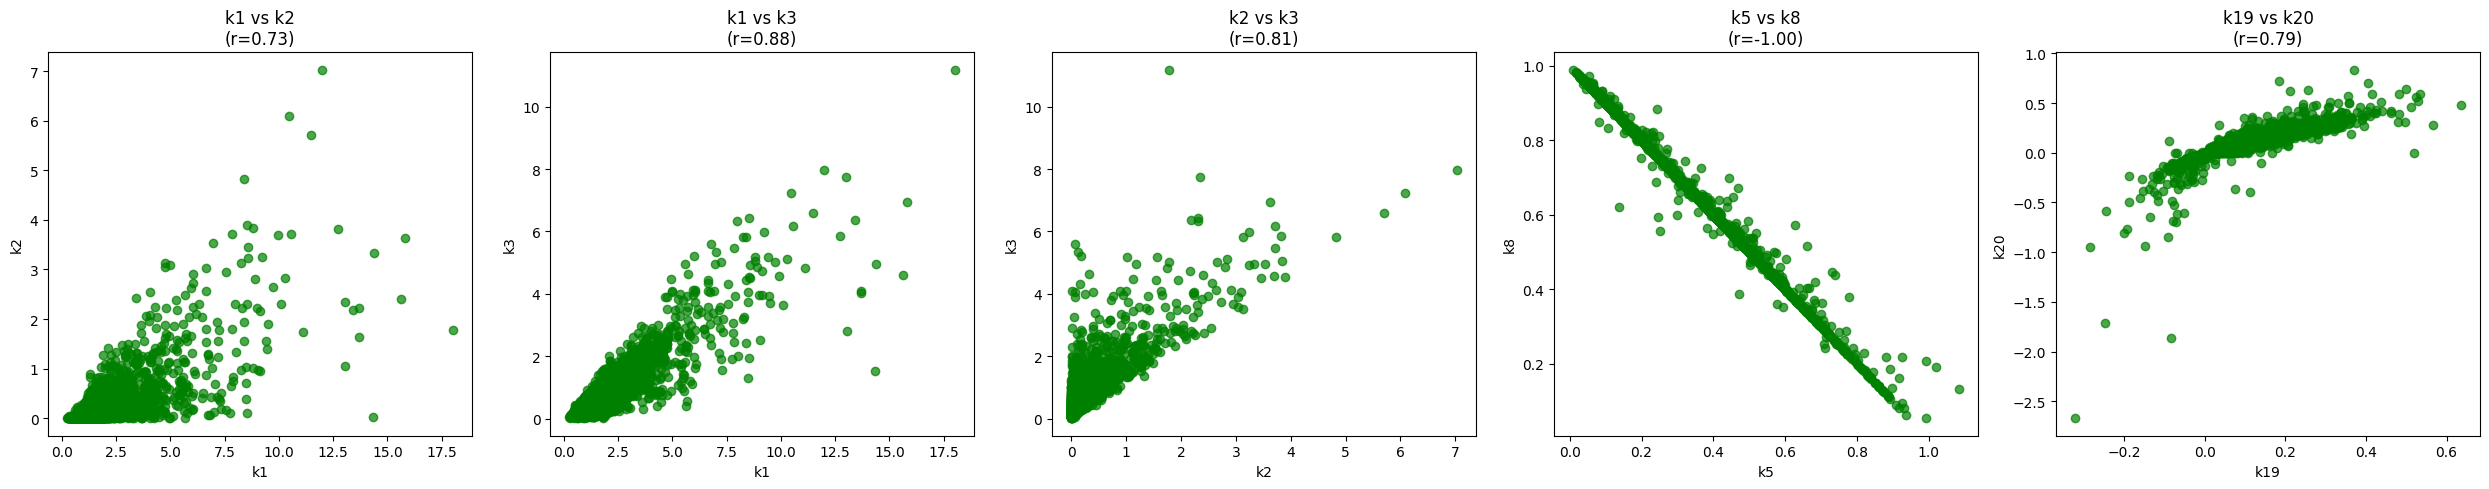

In [12]:
edge = 0.7  
s_pairs = np.where((np.abs(corr_ma) > edge) & signf)

p_pairs = []
for i, j in zip(*s_pairs):
    if i != j and (j, i) not in p_pairs and (i, j) not in p_pairs:
        p_pairs.append((i, j))

if p_pairs:
    n_pairs = len(p_pairs)
    fig, axes = plt.subplots(1, n_pairs, figsize=(5*n_pairs, 5))
    
    if n_pairs == 1:
        axes = [axes]  
    
    for idx, (i, j) in enumerate(p_pairs):
        axes[idx].scatter(df[df.columns[i]], df[df.columns[j]], color='green', alpha=0.7)
        axes[idx].set_title(f'{df.columns[i]} vs {df.columns[j]}\n(r={corr_ma.iloc[i,j]:.2f})')
        axes[idx].set_xlabel(df.columns[i])
        axes[idx].set_ylabel(df.columns[j])
    
    plt.tight_layout()
    plt.show()